In [3]:
!pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import pylab as plt
mpl.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [5]:
url = 'https://raw.githubusercontent.com/avinashsharma99/Python-for-Finance/master/tr_eikon_eod_data_new.csv'
raw = pd.read_csv(url, index_col = 0, parse_dates=True)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


# Correlation Analysis

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. One reason behind is that when the stock index comes down - during a crisis, for instance - trading volume goes up, and therewith also the volatility. When the stock index is on the rise, investors generally are calm and do not see much incentive to engage in heavy trading. In particular, long-only investors then try to ride the trend even further.

In [7]:
data = raw[['.SPX', '.VIX']].dropna()
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010FAB808>,
      dtype=object)

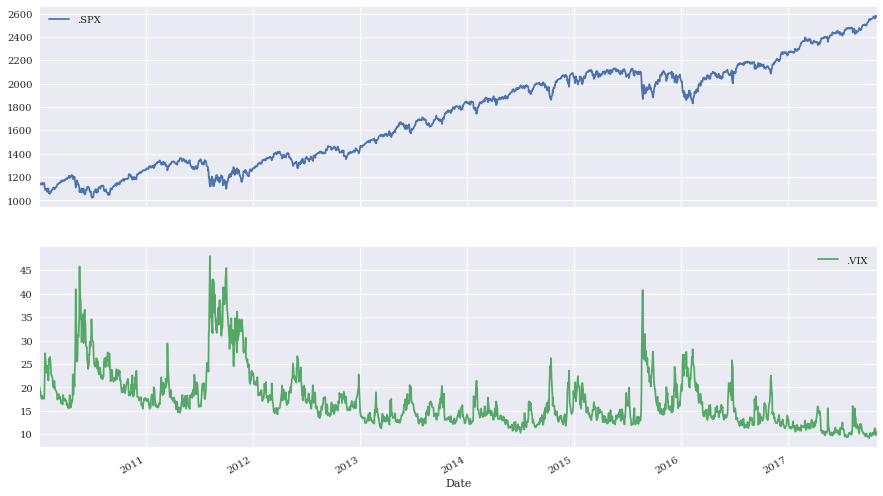

In [8]:
# S&P 500 and VIC time series data (different plots)
data.plot(subplots=True, figsize=(15,9))

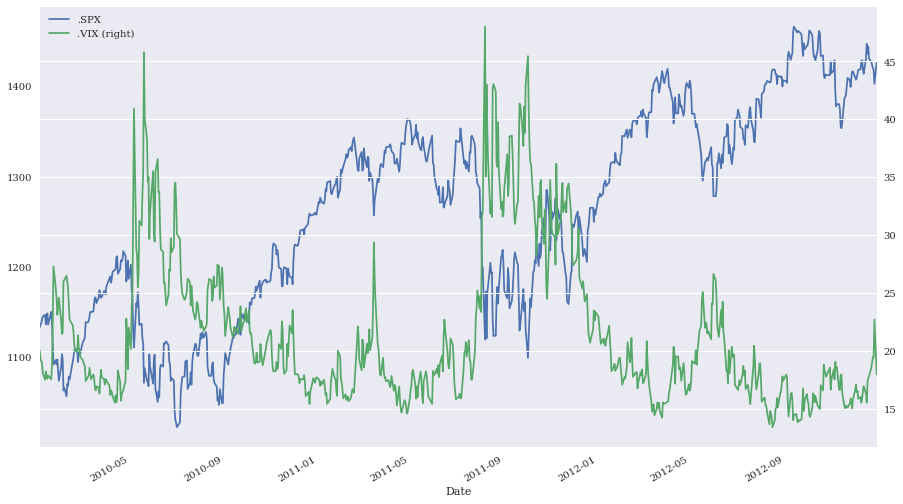

In [9]:
# To visualise the correlation more clearly, we can plot both the time series in a single plot with adjusted scaalings

data.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(15,9)) 

# .loc[:DATE] selects the data until the given value DATE. secondary_y puts the scaling on right hand side as second y scaling

### Logrithmic Returns

In [10]:
rets = np.log(data / data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001328B988>,
      dtype=object)

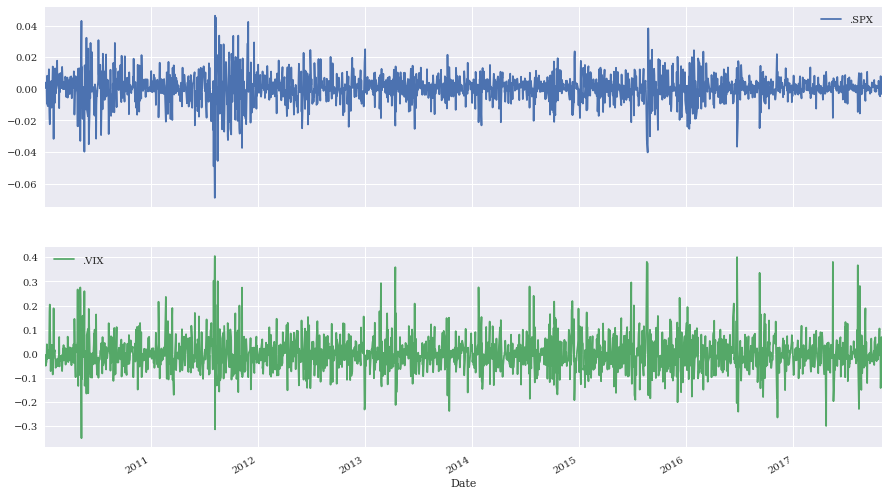

In [11]:
rets.dropna(inplace=True)
# Log returns of the S&P 500 and VIX over time
rets.plot(subplots=True, figsize=(15,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000139E2C48>,
      dtype=object)

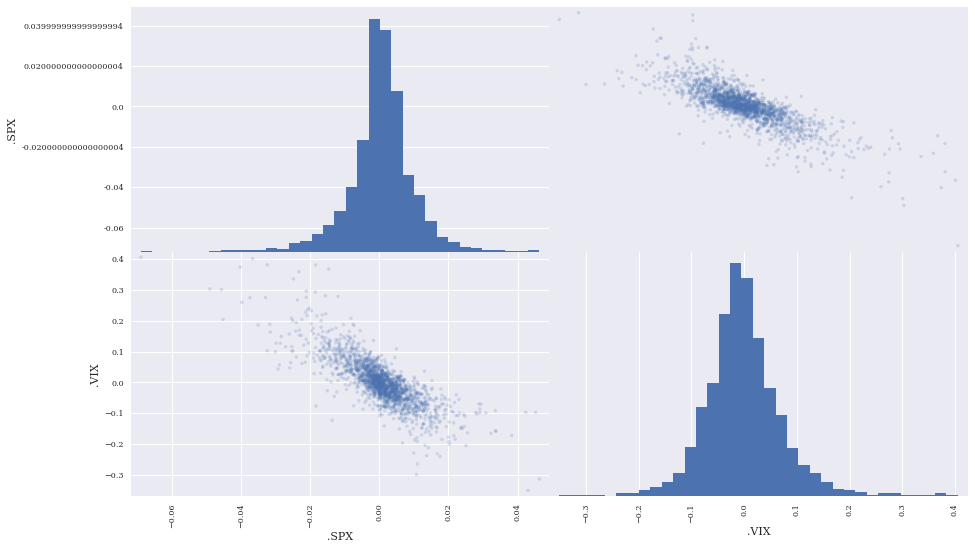

In [12]:
# We can also use pandas scatter_matrix() function to plot the log returns of the two series against each other, and 
# onecan add either a histogram or a kernel density estimator (KDE) on the diagonal 

pd.plotting.scatter_matrix(rets, 
                           alpha=0.2, #transparency
                          diagonal='hist',
                          hist_kwds={'bins':35}, #Keyword to be passed to the histogram plotting function
                          figsize=(15,9))

### OLS Regression (Ordinary Least-Squares)

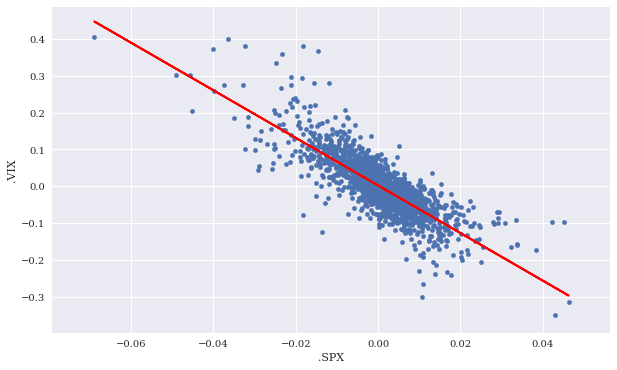

In [13]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) # This implement a linear OLS regression
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10,6)) # This plot the log return as scatter plot...
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)  #..to which linear regression line is added

# Figure of Log returns of the S&P 500 and VIX as a scatter matrix

### Correlation

In [14]:
rets.corr() # The correlation matrix for the whole DataFrame.

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


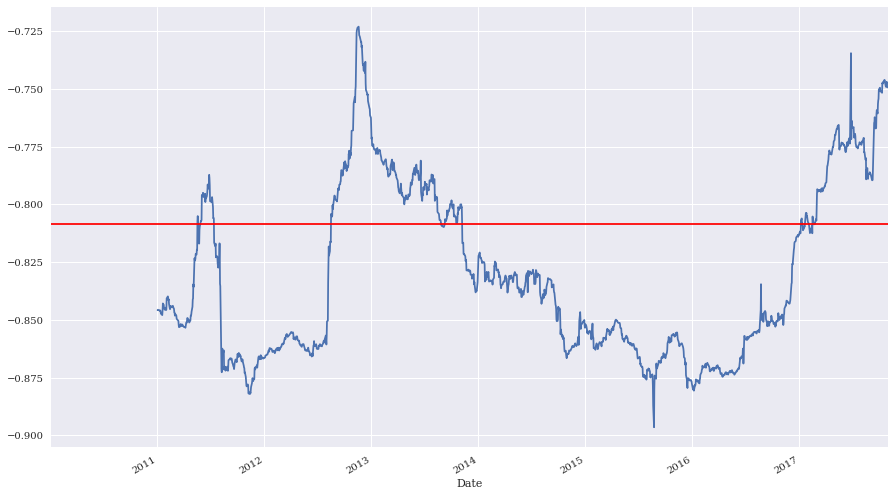

In [15]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(15,9)) # This plots the rolling correlation over time...

ax.axhline(rets.corr().iloc[0,1], c='r') # .... and adds the static value to the plot as horizontal line.

### HIgh-Frequency Data

In [19]:
%%time
url = "https://raw.githubusercontent.com/avinashsharma99/Python-for-Finance/master/fxcm_eur_usd_tick_data.csv"
tick = pd.read_csv(url, index_col = 0, parse_dates=True)

Wall time: 12.8 s


In [20]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    461357 non-null float64
Ask    461357 non-null float64
dtypes: float64(2)
memory usage: 10.6 MB


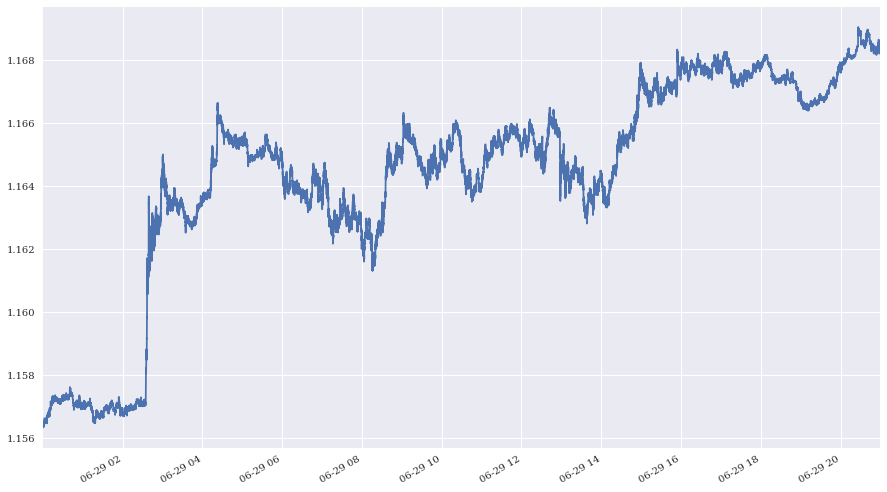

In [22]:
tick['Mid'] = tick.mean(axis=1) # Calculate the mid price for every data row
tick['Mid'].plot(figsize=(15,9))

In [23]:
tick_resam = tick.resample(rule='5Min', label='right').last()
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


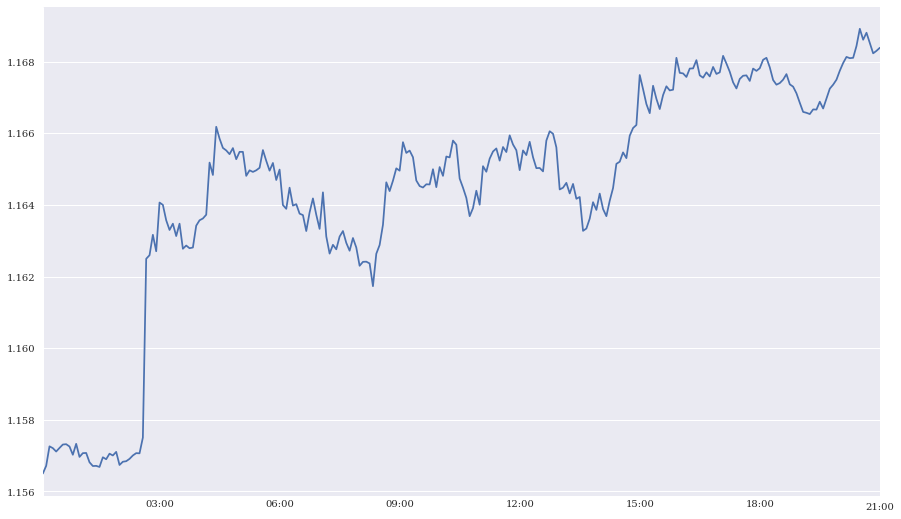

In [25]:
tick_resam['Mid'].plot(figsize=(15,9))